# 🔮 Importaciones necesarias para el proyecto

In [28]:
import os
import cv2
import time
import numpy as np
import pandas as pd
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
print(f"Versión de OpenCV: {cv2.__version__}")
print(f"Versión de Numpy: {np.__version__}")
print(f"Versión de Pandas: {pd.__version__}")
print(f"Versión de TensorFlow: {tf.__version__}")
print(f"Version de Sklearn: {sk.__version__}")
print(f"Versión de Matplotlib.pyplot: {mpl.__version__}")

Versión de OpenCV: 4.8.1
Versión de Numpy: 1.21.5
Versión de Pandas: 1.3.5
Versión de TensorFlow: 2.1.0
Version de Sklearn: 1.0.2
Versión de Matplotlib.pyplot: 3.5.3


In [30]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## 📂 Configuraciones del path para lectura

In [46]:
# Subir un nivel en el explorador de archivos
os.chdir("..")
print(os.getcwd())

c:\Users\USER\Desktop\PDI\Traffic-Sign-Classifier


In [47]:
# Obtenemos la dirección actual del path donde se está ejecutando el Jupyter Notebook
cwd = os.getcwd()
# Nos movemos a la carpeta donde se encuentran las imágenes a testear
os.chdir(f"{cwd}/classifier_resized_TL/")
# Verificamos que nos encontramos en el path correcto
print(os.getcwd())
principal_directory = os.getcwd()

c:\Users\USER\Desktop\PDI\Traffic-Sign-Classifier\classifier_resized_TL


In [48]:
# Listamos los archivos de la ruta
print(os.listdir())

['speeds', 'stops', 'trafficLights']


# 🧐 Lectura de imágenes

In [50]:
images = []
labels = []

i = 0
# Itera sobre las carpetas dentro del directorio principal
for folder in os.listdir(principal_directory):
    folder_path = os.path.join(principal_directory, folder)
    
    # Verifica si el elemento en el directorio es una carpeta
    if os.path.isdir(folder_path):
        
        # Etiqueta de la carpeta
        label = i
        
        # Itera sobre los archivos dentro de la carpeta
        for file in os.listdir(folder_path):
            archivo_path = os.path.join(folder_path, file)
            
            # Lee la imagen con OpenCV y la agrega a la lista
            image = cv2.imread(archivo_path)
            
            # Convertir la imagen al espacio de color RGB desde BGR (formato por defecto de OpenCV)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Normaliza los valores de la imagen de 0 a 1
            normalized_img = image / 255.0
            images.append(normalized_img)
            labels.append(label)
            
    i += 1
            
# Crear un DataFrame a partir de las listas de imágenes y etiquetas
data = {'Images': images, 'Labels': labels}
df = pd.DataFrame(data)            
            
index = np.random.randint(0, len(images))
print("Pixeles de la imagen antes de la normalización: ", images[index][5][5] * 255)
print("Pixeles de la imagen después de la normalización: ", images[index][5][5])
print("-------------------------------------------------------------------------------")
print(len(images))
print(len(labels))

Pixeles de la imagen antes de la normalización:  [126. 200. 235.]
Pixeles de la imagen después de la normalización:  [0.49411765 0.78431373 0.92156863]
-------------------------------------------------------------------------------
531
531


In [51]:
# Subir un nivel en el explorador de archivos
os.chdir("..")
os.chdir(f"{cwd}/classifier/")
print(os.getcwd())

c:\Users\USER\Desktop\PDI\Traffic-Sign-Classifier\classifier


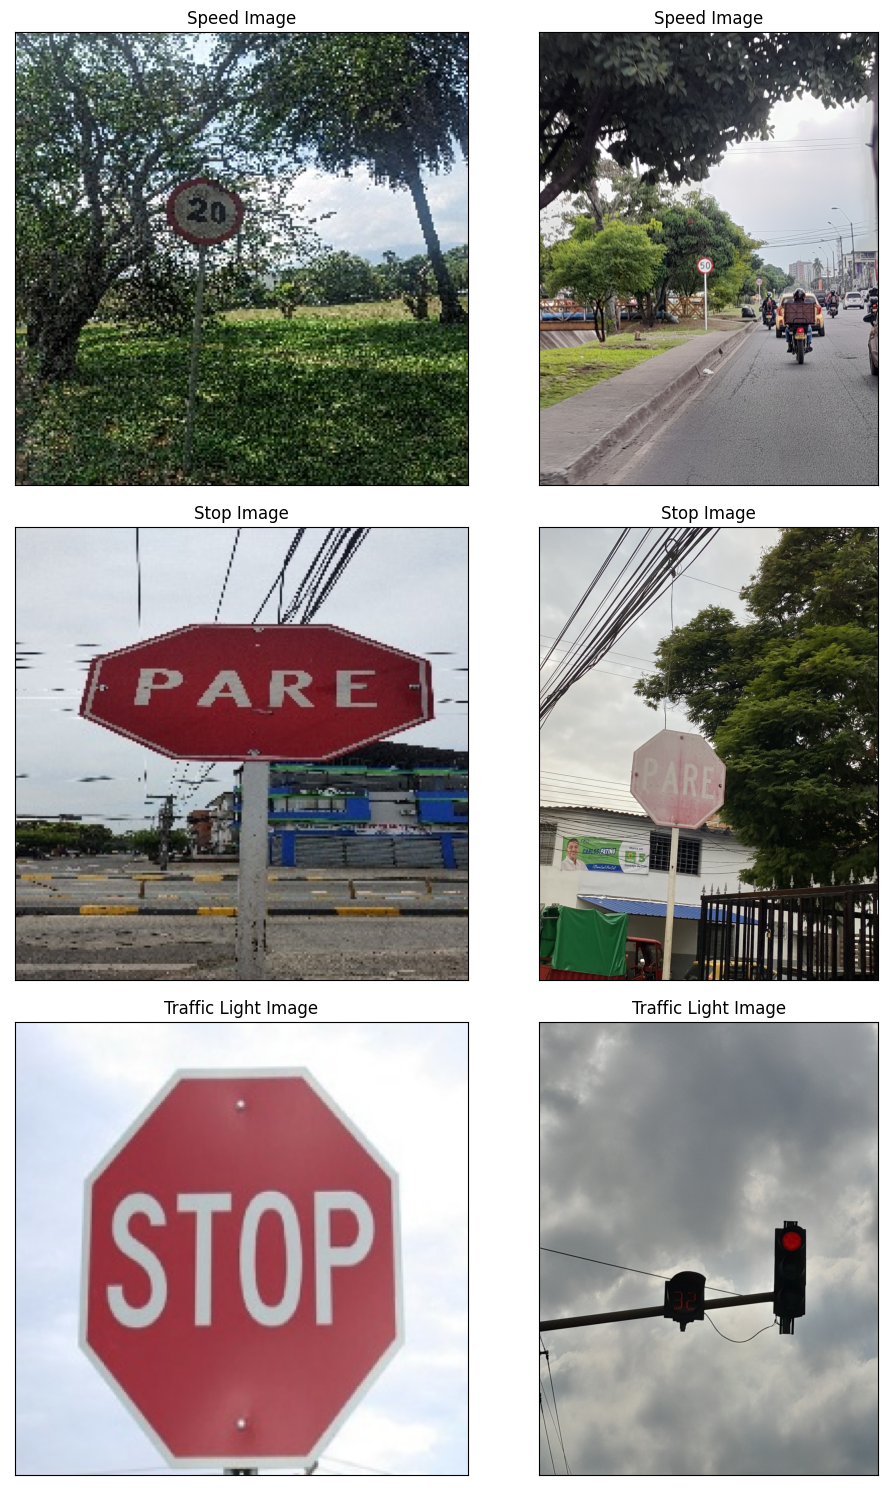

Index Speed: 86
Index Speed normal: 87
Index Stop: 203
Index Stop normal: 78
Index TrafficLight: 303
Index TrafficLight: 53


In [52]:
# Inicializa la figura
plt.figure(figsize=(10, 15))

indexSpeed = np.random.randint(0, 125)
plt.subplot(3, 2, 1), plt.imshow(images[indexSpeed])
plt.gca().set_title('Speed Image')
plt.xticks([]), plt.yticks([])

image_speed = cv2.cvtColor(cv2.imread(f"speeds/Velocidad-{indexSpeed + 1}.jpg"), cv2.COLOR_BGR2RGB)
plt.subplot(3, 2, 2), plt.imshow(image_speed)
plt.gca().set_title('Speed Image')
plt.xticks([]), plt.yticks([])

indexStop = np.random.randint(125, 250)
plt.subplot(3, 2, 3), plt.imshow(images[indexStop])
plt.gca().set_title('Stop Image')
plt.xticks([]), plt.yticks([])

image_stop = cv2.cvtColor(cv2.imread(f"stops/Pare-{indexStop - 125}.jpg"), cv2.COLOR_BGR2RGB)
plt.subplot(3, 2, 4), plt.imshow(image_stop)
plt.gca().set_title('Stop Image')
plt.xticks([]), plt.yticks([])

indexTrafficLight = np.random.randint(250, 375)
plt.subplot(3, 2, 5), plt.imshow(images[indexTrafficLight])
plt.gca().set_title('Traffic Light Image')
plt.xticks([]), plt.yticks([])

image_trafficlight = cv2.cvtColor(cv2.imread(f"trafficLights/Semaforo-{indexTrafficLight - 250}.jpg"), cv2.COLOR_BGR2RGB)
plt.subplot(3, 2, 6), plt.imshow(image_trafficlight)
plt.gca().set_title('Traffic Light Image')
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

print(f"Index Speed: {indexSpeed}")
print(f"Index Speed normal: {indexSpeed + 1}")
print(f"Index Stop: {indexStop}")
print(f"Index Stop normal: {indexStop - 125}")
print(f"Index TrafficLight: {indexTrafficLight}")
print(f"Index TrafficLight: {indexTrafficLight - 250}")

In [53]:
df.head(-1)

,Images,Labels
0,"[[[0.7411764705882353, 0.7764705882352941, 0.8...",0
1,"[[[0.7098039215686275, 0.7294117647058823, 0.7...",0
2,"[[[0.11764705882352941, 0.34901960784313724, 0...",0
3,"[[[0.5215686274509804, 0.5568627450980392, 0.5...",0
4,"[[[0.11764705882352941, 0.3607843137254902, 0....",0
...,...,...
525,"[[[0.7725490196078432, 0.796078431372549, 0.85...",2
526,"[[[0.6274509803921569, 0.6745098039215687, 0.7...",2
527,"[[[0.7254901960784313, 0.7490196078431373, 0.7...",2
528,"[[[0.4980392156862745, 0.5450980392156862, 0.6...",2


### Data Augmentation

In [ ]:
x = np.array(df.Images.tolist())
y = np.array(df.Labels.tolist())
y = y.reshape((y.shape[0],-1))

In [59]:
# Definimos las transformaciones para data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10,
                                                                zoom_range=0.2,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                fill_mode='constant')

In [60]:
train_gen = train_datagen.flow(x=x,
                                y=y,
                                batch_size=32)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50, stratify=y)

num_classes = 3
y_train = to_categorical(y_train, num_classes) 
y_test = to_categorical(y_test, num_classes)

print(f"X_Train: {x_train.shape}")
print(f"X_Test: {x_test.shape}")
print(f"Y_Train: {y_train.shape}")
print(f"Y_Test: {y_test.shape}")

X_Train: (424, 224, 224, 3)
X_Test: (107, 224, 224, 3)
Y_Train: (424, 3)
Y_Test: (107, 3)


## Build the model

### Model taked from: [Kaggle](https://www.kaggle.com/code/yacharki/traffic-signs-image-classification-96-cnn)

In [62]:
# Cargamos una red InceptionV3 sin el top (capas densas del final)
extractor = tf.keras.applications.MobileNetV2(weights='imagenet',
                                            include_top=False,
                                            input_shape=(224, 224, 3))
extractor.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [63]:
# Congelamos el extractor de características (Transfer Learning)
for layer in extractor.layers:
    layer.trainable=False

In [123]:
# # Creamos una capa de pooling para consolidar los feature maps de salida
pool = tf.keras.layers.GlobalAveragePooling2D()(extractor.output)
# # Agregamos una capa densa
dense1 = tf.keras.layers.Dense(units=6, activation="relu", kernel_regularizer= l2(0.001))(pool)
# Agregamos dropout para regularización
drop1 = tf.keras.layers.Dropout(0.4)(dense1)
# Agregamos una capa de salida
dense2 = tf.keras.layers.Dense(units=3, activation="softmax")(drop1)
# Definimos nuestro modelo de transfer learning
tl_model = tf.keras.models.Model(inputs=[extractor.input], outputs=[dense2])

# Compilamos el modelo
tl_model.compile(loss = "categorical_crossentropy", optimizer = tf.optimizers.Adam(learning_rate=1e-3), metrics = ["accuracy"])
tl_model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
___________________________________________________________________________________________

In [124]:
# Subir un nivel en el explorador de archivos
os.chdir("..")
os.chdir(f"{cwd}/models/")
model_directory = os.getcwd()
print(os.getcwd())
# Listamos los archivos de la ruta
print(os.listdir())

c:\Users\USER\Desktop\PDI\Traffic-Sign-Classifier\models
['best_modelV1.h5', 'best_modelV3_TL.h5', 'ModelV3_TL.h5']


In [125]:
# Callbacks
checkpoint = ModelCheckpoint(
                filepath = 'ModelV3_TL.h5',
                monitor = 'accuracy',
                mode = 'max',
                save_best_only = True,
                # save_weights_only = True
            )
stopping = EarlyStopping(
            monitor = 'val_accuracy',
            patience = 50,
            mode = 'max',
            restore_best_weights=True
        )

In [126]:
# Training the Model
start = time.time()
with tf.device('/GPU:0'):
    history = tl_model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test), callbacks=[checkpoint, stopping])
finish = time.time()
print(f"Se demoró: {finish - start} segundos.")

Train on 424 samples, validate on 107 samples
Epoch 1/400
424/424 [==============================] - 3s 7ms/sample - loss: 1.1164 - accuracy: 0.4057 - val_loss: 1.0322 - val_accuracy: 0.4860
Epoch 2/400
424/424 [==============================] - 1s 2ms/sample - loss: 0.9570 - accuracy: 0.5283 - val_loss: 0.9335 - val_accuracy: 0.4579
Epoch 3/400
424/424 [==============================] - 1s 2ms/sample - loss: 0.8543 - accuracy: 0.5448 - val_loss: 0.8553 - val_accuracy: 0.5607
Epoch 4/400
424/424 [==============================] - 1s 2ms/sample - loss: 0.8285 - accuracy: 0.5684 - val_loss: 0.8793 - val_accuracy: 0.4953
Epoch 5/400
424/424 [==============================] - 1s 2ms/sample - loss: 0.7829 - accuracy: 0.5778 - val_loss: 0.7869 - val_accuracy: 0.5981
Epoch 6/400
424/424 [==============================] - 1s 2ms/sample - loss: 0.7464 - accuracy: 0.5943 - val_loss: 0.8903 - val_accuracy: 0.5047
Epoch 7/400
424/424 [==============================] - 1s 2ms/sample - loss: 0.6999 

In [134]:
# model = load_model('ModelV1.h5')

loss, acc = tl_model.evaluate(x_test,y_test, verbose=1)
print("Loss:{0} - Accuracy:{1}".format(loss, acc))

# save_model(tl_model, "best_modelV3_TL.h5")

107/107 [==============================] - 0s 4ms/sample - loss: 0.4634 - accuracy: 0.8879
Loss:0.4634292635405175 - Accuracy:0.8878504633903503


In [135]:
# model1 = load_model("best_modelV1.h5")
model1 = load_model(f"{model_directory}/best_modelV3_TL.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(model1)

# Configura el convertidor para la cuantificación de enteros dinámica
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convierte el modelo
tflite_model = converter.convert()

# Guarda el modelo en el sistema de archivos
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

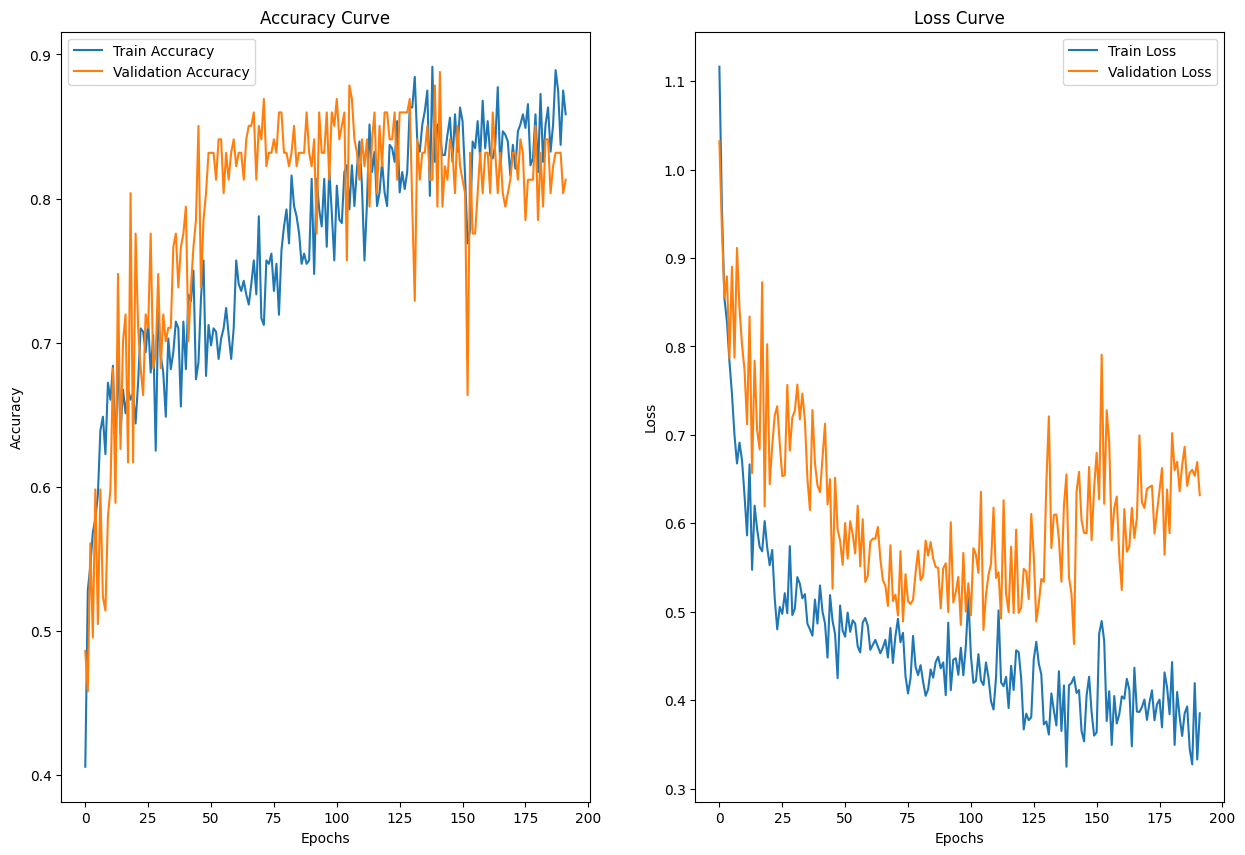

In [128]:
plt.figure(figsize=(15, 10))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

               precision    recall  f1-score   support

        Speed       0.88      0.88      0.88        40
         Stop       0.84      0.91      0.87        34
Traffic-Light       0.97      0.88      0.92        33

     accuracy                           0.89       107
    macro avg       0.89      0.89      0.89       107
 weighted avg       0.89      0.89      0.89       107

------------------------------------------------------------------------------


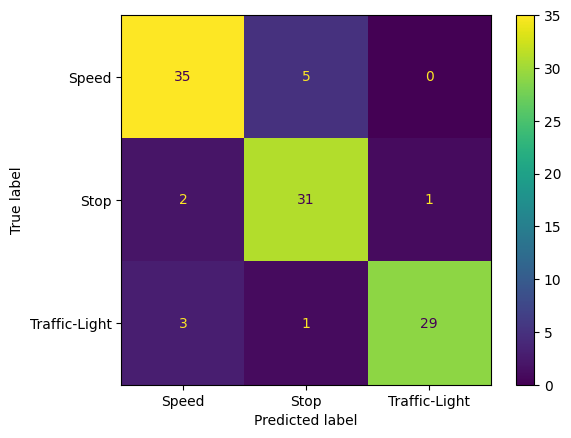

In [129]:
# Matriz de confusion
y_pred = tl_model.predict(x_test)

# Convierte las matrices codificadas one-hot a etiquetas de clase
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Define las etiquetas de clase correspondientes a tus clases
clases = ["Speed", "Stop", "Traffic-Light"]

# Calcula la matriz de confusión
confusion = confusion_matrix(y_test_labels, y_pred_labels, labels=range(len(clases)))

print(classification_report(y_test_labels, y_pred_labels, target_names = clases))

print("------------------------------------------------------------------------------")

# Crea un gráfico de matriz de confusión
disp = ConfusionMatrixDisplay(confusion, display_labels=clases)
disp.plot()
plt.show()

In [130]:
# Subir un nivel en el explorador de archivos
os.chdir("..")
os.chdir(f"{cwd}/model_test/")
test_directory = os.getcwd()
print(os.getcwd())

c:\Users\USER\Desktop\PDI\Traffic-Sign-Classifier\model_test


In [131]:
def convert_image(path):
    img = cv2.imread(path)
    img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized_img = cv2.resize(img_color, (224, 224))
    normalized_img = resized_img / 255.0
    return normalized_img

def reshape_image(img):
    good_image = np.reshape(img, (1, 224, 224, 3))
    return good_image

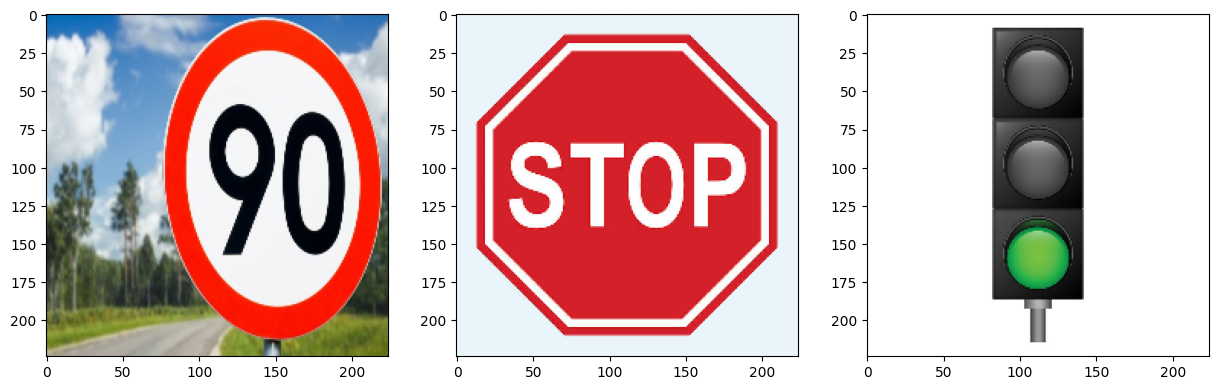

In [132]:
# Lee la imagen
image_Test_Speed = convert_image(f"{test_directory}/speed-1.jpg")
image_Test_Stop = convert_image(f"{test_directory}/stop-1.jpg")
image_Test_Traffic_Light = convert_image(f"{test_directory}/trafficlight-1.jpg")

plt.figure(figsize=(15, 10))

# Plot accuracy
plt.subplot(1, 3, 1), plt.imshow(image_Test_Speed)
plt.subplot(1, 3, 2), plt.imshow(image_Test_Stop)
plt.subplot(1, 3, 3), plt.imshow(image_Test_Traffic_Light)

plt.show()

image_Test_Speed = reshape_image(image_Test_Speed)
image_Test_Stop = reshape_image(image_Test_Stop)
image_Test_Traffic_Light = reshape_image(image_Test_Traffic_Light)

In [133]:
start = time.time()
y_pred_speed = tl_model.predict(image_Test_Speed)
print("SPEED == 0")
print(y_pred_speed.argmax())
finish = time.time()
print(f"Speed se demoró: {finish - start} segundos.")
print("--------------------------------------------------------------------")

start = time.time()
print("STOP == 1")
y_pred_stop = tl_model.predict(image_Test_Stop)
print(y_pred_stop.argmax())
finish = time.time()
print(f"Stop se demoró: {finish - start} segundos.")
print("--------------------------------------------------------------------")

start = time.time()
print("TRAFFIC LIGHT == 2")
y_pred_trafficlight = tl_model.predict(image_Test_Traffic_Light)
print(y_pred_trafficlight.argmax())
finish = time.time()
print(f"Traffic LLight se demoró: {finish - start} segundos.")
print("--------------------------------------------------------------------")

SPEED == 0
0
Speed se demoró: 0.06650733947753906 segundos.
--------------------------------------------------------------------
STOP == 1
1
Stop se demoró: 0.04915881156921387 segundos.
--------------------------------------------------------------------
TRAFFIC LIGHT == 2
0
Traffic LLight se demoró: 0.049005746841430664 segundos.
--------------------------------------------------------------------
